<h1>Simple Spreadsheet Analysis</h1>

<h3>Virinchi Ande</h3>

<h5>Importing the Data</h5>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\\virin\\Desktop\\Simple-Spreadsheet-Analysis--Via-master\\HireArt.csv")
data.head(5)

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
3,Milan Crona,Armstrong Group,2013-11-02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25


<h5>Exploring the Data</h5>

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 3 columns):
Account manager    1001 non-null object
Client Name        1001 non-null object
Date of Contact    1001 non-null object
dtypes: object(3)
memory usage: 23.5+ KB


In [3]:
data['year'], data['month'], data['day'] = zip(*data['Date of Contact'].map(lambda x: x.split('-')))

In [4]:
data.head(5)

,Account manager,Client Name,Date of Contact,year,month,day
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,2015,10,31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,2013,12,15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,2013,12,07
3,Milan Crona,Armstrong Group,2013-11-02,2013,11,02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,2013,12,25


In [5]:
pd.DataFrame(data['Account manager'].unique(),columns = ['Account Manager Names'])

,Account Manager Names
0,Milan Crona
1,Aidan Pouros
2,Chauncey Dach
3,Rigoberto White


This shows the no of clients who were contacted atleast once by the account managers on different dates

In [6]:
grouped = data.groupby('Account manager')
no_of_clients_manager = grouped['Client Name'].count() 
pd.DataFrame(no_of_clients_manager)

,Client Name
Account manager,
Aidan Pouros,240
Chauncey Dach,253
Milan Crona,286
Rigoberto White,222


The below result shows the number of clients who contacted in a perticular year.

In [7]:
grouped = data.groupby('year')
no_of_clients_contacted_year= grouped['Client Name'].count() 
pd.DataFrame(no_of_clients_contacted_year)

,Client Name
year,
2013,99
2014,264
2015,251
2016,240
2017,147


The result below shows that each year same number of unique clients are contacted

In [8]:
grouped = data.groupby('year')
no_of_clients_contacted_year= grouped['Client Name'].nunique() 
pd.DataFrame(no_of_clients_contacted_year)

,Client Name
year,
2013,35
2014,35
2015,35
2016,35
2017,35


In [9]:
pd.DataFrame(data['Client Name'].unique(),columns = ['Client Names'])

,Client Names
0,"Wyman, Farrell and Haag"
1,"Veum, McClure and Schuster"
2,Armstrong Group
3,"Lueilwitz, Moore and Hahn"
4,Abbott Group
5,"Oga, Gottlieb and Cruickshank"
6,"Fahey, Wunsch and Bashirian"
7,Bosco-Ortiz
8,Ondricka-Wolff
9,"Anderson, Kutch and Hyatt"


The result below shows that each month number of clients contacted more than once across all years. It shows that October month has the highest number of clients contacted more than once across all years.

In [10]:
grouped = data.groupby('month')
no_of_clients = grouped['Client Name'].count().sort_values(ascending = False)
pd.DataFrame(no_of_clients)

,Client Name
month,
10,213
09,121
08,79
12,77
06,77
05,69
07,66
11,65
02,64


The result below shows that each month number of unique clients contacted across all years. It shows that October month has the highest number of unique clients contacted across all years.

In [11]:
def time_contact_clients():
    grouped = data.groupby('month')
    no_of_clients = grouped['Client Name'].nunique() 
    my_dict = {}
    j =0
    for i in grouped:
        my_dict[i[0]]=no_of_clients[j]
        j = j+1
    maximum = max(my_dict, key=my_dict.get)
    print("The month to contact the most clients: \n",maximum,"month as max number of unique clients contacted across all years with",my_dict[maximum],"unique clients")
    #print(my_dict)

In [12]:
time_contact_clients()

The month to contact the most clients: 
 10 month as max number of unique clients contacted across all years with 35 unique clients


In [13]:
def perc_contact_clients():
    no_unique_clients_total = data['Client Name'].nunique()
    grouped = data.groupby('month')
    no_of_clients = grouped['Client Name'].nunique()
    perc = (no_of_clients/no_unique_clients_total) * 100
    my_dict = {}
    j =0
    for i in grouped:
        my_dict[i[0]]=perc[j]
        j = j+1
    maximum = max(my_dict, key=my_dict.get)  
    print("The month to contact the most clients: \n",maximum)
    print(perc)

In [14]:
perc_contact_clients()

The month to contact the most clients: 
 10
month
01     85.714286
02     88.571429
03     82.857143
04     74.285714
05     94.285714
06     97.142857
07     80.000000
08     94.285714
09     94.285714
10    100.000000
11     85.714286
12     91.428571
Name: Client Name, dtype: float64


The results below shows the year and month in which most of unique clients were contacted

In [15]:
def perc_contact_clients_year():
    no_unique_clients_total = data['Client Name'].nunique()
    grouped = data.groupby(['year', 'month'])
    no_of_clients = grouped['Client Name'].nunique()
    perc = (no_of_clients/no_unique_clients_total) * 100
    my_dict = {}
    j =0
    for i in grouped:
        my_dict[i[0]]=perc[j]
        j = j+1
    maximum = max(my_dict, key=my_dict.get)  
    print("The year and month in which most unique clients were contacted across all years: \n",maximum)
    
   

In [16]:
perc_contact_clients_year()

The year and month in which most unique clients were contacted across all years: 
 ('2013', '10')


In [17]:
def perc_contact_clients_month_year():
    
    years = list(data.year.unique())
    for y in years:
        data_year = data[data['year'] == y]
        grouped = data_year.groupby(['month'])
        no_of_clients = grouped['Client Name'].nunique()
        no_unique_clients_total = data_year['Client Name'].nunique()
        perc = (no_of_clients/no_unique_clients_total) * 100
        my_dict = {}
        j =0
        for i in grouped:
            my_dict[i[0]]=perc[j]
            j = j+1
        maximum = max(my_dict, key=my_dict.get)  
        print("In the year",y,"month in which max no of unique clients conatcted is:",maximum,"with",round(my_dict[maximum],4),"percentage ")
        plt.bar(range(len(my_dict)), list(my_dict.values()), align='center')
        plt.xticks(range(len(my_dict)), list(my_dict.keys()))
        plt.show()

In the year 2015 month in which max no of unique clients conatcted is: 10 with 80.0 percentage 


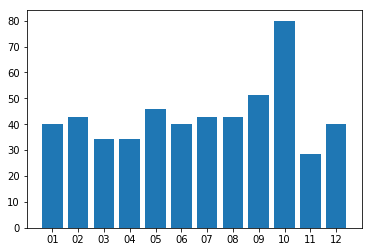

In the year 2013 month in which max no of unique clients conatcted is: 10 with 88.5714 percentage 


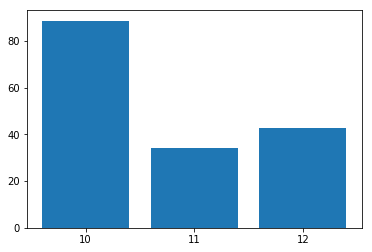

In the year 2016 month in which max no of unique clients conatcted is: 10 with 71.4286 percentage 


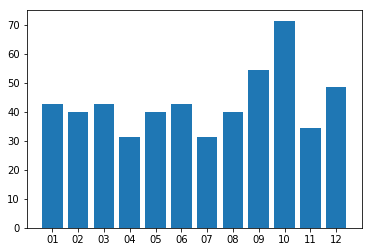

In the year 2014 month in which max no of unique clients conatcted is: 10 with 80.0 percentage 


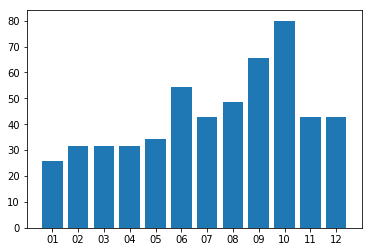

In the year 2017 month in which max no of unique clients conatcted is: 09 with 60.0 percentage 


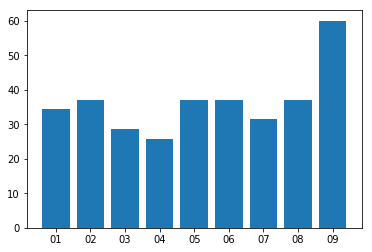

In [18]:
perc_contact_clients_month_year()